Import required libraries

In [1]:
# to work with the file system and folder structure
import os
import time
import glob
import pathlib

import numpy as np # to work with arrays
import pandas as pd # to work with dataframes
import matplotlib.pyplot as plt # to plot graphs for data and accuracy
import seaborn as sns # to plot graphs for data and accuracy

Check categories of news articles available

In [2]:
os.listdir('/kaggle/input/bbc-news-summary/BBC News Summary/Summaries/')

['politics', 'sport', 'tech', 'entertainment', 'business']

Defining paths for variables for articles and summaries along with setting a list for categories of news articles

In [3]:
# Now we define paths for articles, summaries and maintain a list of categories of our data
article_path = '/kaggle/input/bbc-news-summary/BBC News Summary/News Articles'
summary_path = '/kaggle/input/bbc-news-summary/BBC News Summary/Summaries'
categories_list = ['politics', 'sport', 'tech', 'entertainment', 'business']

**purpose of the function** : to read into the folders and store articles, summaries and categories into variables.

In [4]:
# providing inputs for articles, summaries and categories
def read_in_folders(article_path, summary_path, categories_list, encoding = "ISO-8859-1"):
    articles = []
    summaries = []
    categories = []
    
    
    for category in categories_list: # category iterates over the entire list of categories one by one
        
        # store all articles & summaries in the variables respectively for a given category, recursively
        # therefore, essentially it make a list for all artivles and summaries per category, in the end it stores it for all categories
        article_paths = glob.glob(os.path.join(article_path, category, '*.txt'), recursive=True)
        summary_paths = glob.glob(os.path.join(summary_path, category, '*.txt'), recursive=True)
        
        print(f'found {len(article_paths)} in articles/{category} folder, {len(summary_paths)} in summaries/{category}')
        
        # check if number of articles & summaries are same or not
        if(len(article_paths) != len(summary_paths)):
            print('Both are not equal')
            return 
        
        # put the content of all articles per category in articles
        for index in range(len(article_paths)):
            categories.append(category)
            with open(article_paths[index], mode = 'r', encoding = encoding) as file:
                articles.append(file.read())
                
            with open(summary_paths[index], mode = 'r', encoding = encoding) as file:
                summaries.append(file.read())
                
    return articles, summaries, categories

In [5]:
#store the return values into the variables
articles, summaries, categories = read_in_folders(article_path, summary_path, categories_list)

found 417 in articles/politics folder, 417 in summaries/politics
found 511 in articles/sport folder, 511 in summaries/sport
found 401 in articles/tech folder, 401 in summaries/tech
found 386 in articles/entertainment folder, 386 in summaries/entertainment
found 510 in articles/business folder, 510 in summaries/business


Create a dataframe to work with the data

In [6]:
#creates the dataframe df with articles, summaries and categories storeed in key value pairs
df = pd.DataFrame({'articles':articles, 'summaries':summaries, 'categories': categories},)
df


,articles,summaries,categories
0,Budget to set scene for election\n\nGordon Bro...,- Increase in the stamp duty threshold from Â£...,politics
1,Army chiefs in regiments decision\n\nMilitary ...,"""They are very much not for the good and will ...",politics
2,Howard denies split over ID cards\n\nMichael H...,Michael Howard has denied his shadow cabinet w...,politics
3,Observers to monitor UK election\n\nMinisters ...,The report said individual registration should...,politics
4,Kilroy names election seat target\n\nEx-chat s...,"UKIP's leader, Roger Knapman, has said he is g...",politics
...,...,...,...
2220,India opens skies to competition\n\nIndia will...,India will allow domestic commercial airlines ...,business
2221,Yukos bankruptcy 'not US matter'\n\nRussian au...,Yukos says a US court was entitled to declare ...,business
2222,Survey confirms property slowdown\n\nGovernmen...,House prices were 11.8% higher on the year in ...,business
2223,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ...",business


In [7]:
df['categories'].head()

0    politics
1    politics
2    politics
3    politics
4    politics
Name: categories, dtype: object

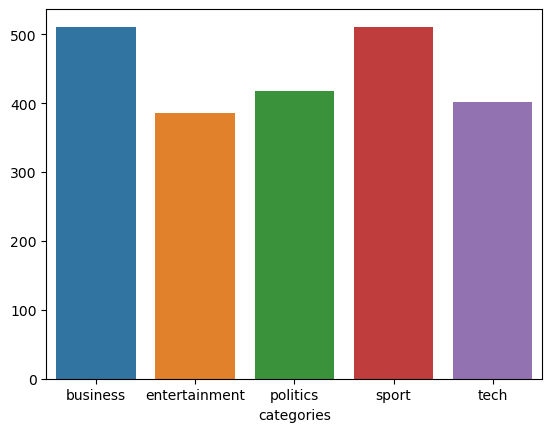

In [8]:
# group sizes by the various categories 
categ_sizes = df.groupby('categories').size() 
sns.barplot(x=categ_sizes.index, y=categ_sizes) # indexes are the different categories
plt.show()

Caclulating the number of words in each article & summary

In [9]:
# apply adds allows us to apply the lambda function and store output in the new columns into the dataframe
# x is each article, x.split() split each word in x and len returns the final number of words
df['article_len'] = df['articles'].apply(lambda x : len(x.split())) 
df['summary_len'] = df['summaries'].apply(lambda x : len(x.split()))


In [10]:
df

,articles,summaries,categories,article_len,summary_len
0,Budget to set scene for election\n\nGordon Bro...,- Increase in the stamp duty threshold from Â£...,politics,538,192
1,Army chiefs in regiments decision\n\nMilitary ...,"""They are very much not for the good and will ...",politics,500,266
2,Howard denies split over ID cards\n\nMichael H...,Michael Howard has denied his shadow cabinet w...,politics,540,225
3,Observers to monitor UK election\n\nMinisters ...,The report said individual registration should...,politics,496,223
4,Kilroy names election seat target\n\nEx-chat s...,"UKIP's leader, Roger Knapman, has said he is g...",politics,440,185
...,...,...,...,...,...
2220,India opens skies to competition\n\nIndia will...,India will allow domestic commercial airlines ...,business,225,90
2221,Yukos bankruptcy 'not US matter'\n\nRussian au...,Yukos says a US court was entitled to declare ...,business,398,180
2222,Survey confirms property slowdown\n\nGovernmen...,House prices were 11.8% higher on the year in ...,business,322,120
2223,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ...",business,406,197


In [11]:
# 0 means x axis\
# check mean length of all articles per category
category_wise_len = df.groupby('categories', 0).agg({'article_len': 'mean', 'summary_len': 'mean'})
category_wise_len

,article_len,summary_len
categories,,
business,328.880392,139.929412
entertainment,330.621762,144.049223
politics,453.973621,195.709832
sport,329.262231,143.187867
tech,502.695761,213.837905


In [12]:
!nvidia-smi

Sat Apr  8 08:58:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [13]:
# !python -m pip install --upgrade pip

In [14]:
# !pip install --quiet transformers==4.5.0
# !pip install --quiet pytorch-lightning==1.2.7
# !pip install --quiet torch==1.8.0
# !pip install --quiet torchvision==0.9.0
# !pip install --quiet torchtext==0.9.0

In [15]:
!pip install --quiet transformers
!pip install --quiet pytorch-lightning
!pip install --quiet torch
!pip install --quiet torchvision
!pip install --quiet torchtext

In [16]:
import json
import torch
import pandas as pd
import numpy as np
from pathlib import Path
import pytorch_lightning as pl
from torch.utils.data import Dataset, DataLoader
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from sklearn.model_selection import train_test_split
from termcolor import colored
import textwrap

from transformers import (
AdamW,
T5ForConditionalGeneration,
T5TokenizerFast as T5Tokenizer)

from tqdm.auto import tqdm

In [17]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize']=16, 10

In [18]:
df

,articles,summaries,categories,article_len,summary_len
0,Budget to set scene for election\n\nGordon Bro...,- Increase in the stamp duty threshold from Â£...,politics,538,192
1,Army chiefs in regiments decision\n\nMilitary ...,"""They are very much not for the good and will ...",politics,500,266
2,Howard denies split over ID cards\n\nMichael H...,Michael Howard has denied his shadow cabinet w...,politics,540,225
3,Observers to monitor UK election\n\nMinisters ...,The report said individual registration should...,politics,496,223
4,Kilroy names election seat target\n\nEx-chat s...,"UKIP's leader, Roger Knapman, has said he is g...",politics,440,185
...,...,...,...,...,...
2220,India opens skies to competition\n\nIndia will...,India will allow domestic commercial airlines ...,business,225,90
2221,Yukos bankruptcy 'not US matter'\n\nRussian au...,Yukos says a US court was entitled to declare ...,business,398,180
2222,Survey confirms property slowdown\n\nGovernmen...,House prices were 11.8% higher on the year in ...,business,322,120
2223,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ...",business,406,197


In [19]:
df = df[['articles', 'summaries']] # only keeping the columns articles and summaries

In [20]:
df

,articles,summaries
0,Budget to set scene for election\n\nGordon Bro...,- Increase in the stamp duty threshold from Â£...
1,Army chiefs in regiments decision\n\nMilitary ...,"""They are very much not for the good and will ..."
2,Howard denies split over ID cards\n\nMichael H...,Michael Howard has denied his shadow cabinet w...
3,Observers to monitor UK election\n\nMinisters ...,The report said individual registration should...
4,Kilroy names election seat target\n\nEx-chat s...,"UKIP's leader, Roger Knapman, has said he is g..."
...,...,...
2220,India opens skies to competition\n\nIndia will...,India will allow domestic commercial airlines ...
2221,Yukos bankruptcy 'not US matter'\n\nRussian au...,Yukos says a US court was entitled to declare ...
2222,Survey confirms property slowdown\n\nGovernmen...,House prices were 11.8% higher on the year in ...
2223,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ..."


In [21]:
# removing non-ascii keywords from the data
df['articles']=df['articles'].str.encode('ascii', 'ignore').str.decode('ascii')
df['summaries']=df['summaries'].str.encode('ascii', 'ignore').str.decode('ascii')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
df

,articles,summaries
0,Budget to set scene for election\n\nGordon Bro...,- Increase in the stamp duty threshold from 60...
1,Army chiefs in regiments decision\n\nMilitary ...,"""They are very much not for the good and will ..."
2,Howard denies split over ID cards\n\nMichael H...,Michael Howard has denied his shadow cabinet w...
3,Observers to monitor UK election\n\nMinisters ...,The report said individual registration should...
4,Kilroy names election seat target\n\nEx-chat s...,"UKIP's leader, Roger Knapman, has said he is g..."
...,...,...
2220,India opens skies to competition\n\nIndia will...,India will allow domestic commercial airlines ...
2221,Yukos bankruptcy 'not US matter'\n\nRussian au...,Yukos says a US court was entitled to declare ...
2222,Survey confirms property slowdown\n\nGovernmen...,House prices were 11.8% higher on the year in ...
2223,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ..."


In [23]:
# remove null values
df = df.dropna()

In [24]:
df

,articles,summaries
0,Budget to set scene for election\n\nGordon Bro...,- Increase in the stamp duty threshold from 60...
1,Army chiefs in regiments decision\n\nMilitary ...,"""They are very much not for the good and will ..."
2,Howard denies split over ID cards\n\nMichael H...,Michael Howard has denied his shadow cabinet w...
3,Observers to monitor UK election\n\nMinisters ...,The report said individual registration should...
4,Kilroy names election seat target\n\nEx-chat s...,"UKIP's leader, Roger Knapman, has said he is g..."
...,...,...
2220,India opens skies to competition\n\nIndia will...,India will allow domestic commercial airlines ...
2221,Yukos bankruptcy 'not US matter'\n\nRussian au...,Yukos says a US court was entitled to declare ...
2222,Survey confirms property slowdown\n\nGovernmen...,House prices were 11.8% higher on the year in ...
2223,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ..."


In [25]:
train_df, test_df = train_test_split(df, test_size = 0.1)

In [26]:
train_df

,articles,summaries
131,Report attacks defence spending\n\nThe Ministr...,"Lord Bach, Minister for Defence Procurement, s..."
1348,Bookmakers back Aviator for Oscar\n\nThe Aviat...,The Aviator has been tipped by UK bookmakers a...
710,Parry relishes Anfield challenge\n\nBBC Sport ...,"I would keep Gerrard.Parry labelled the deal ""..."
843,Smith keen on Home series return\n\nScotland m...,Scotland manager Walter Smith has given his ba...
1177,The year search became personal\n\nThe odds ar...,Web users face a plethora of choices as each c...
...,...,...
1507,Baby becomes new Oscar favourite\n\nClint East...,Clint Eastwood's boxing drama Million Dollar B...
1235,Microsoft debuts security tools\n\nMicrosoft i...,Microsoft is releasing tools that clean up PCs...
136,Campaign 'cold calls' questioned\n\nLabour and...,A spokesman for the Information Commissioner's...
2151,Weak data buffets French economy\n\nA batch of...,"""[The unemployment figures] show the main prob..."


In [27]:
class NewsSummaryDataset(Dataset):
    
    # constructor
    def __init__(
    self,
    data : pd.DataFrame,
    tokenizer : T5Tokenizer, 
    text_maxlen : int = 512,
    summary_maxlen : int = 128):
        
        self.tokenizer = tokenizer
        self.data = data
        self.text_maxlen = text_maxlen
        self.summary_maxlen = summary_maxlen
        
    #length of the data
    def __len__(self):
        return len(self.data)
    
    # obtain each data row-wise
    def __getitem__(self, index : int):
        data_row = self.data.iloc[index]
        text = data_row['articles'] # pick articles column of the row
        
        #encoding the text with tokenizer
        article_encoding = tokenizer(
            text, 
            max_len=self.text.text_maxlen,
            truncation=True, # if length greater than 512 remove them
            padding='max_length',
            return_attention_mask=True,
            add_special_tokens=True,
            return_tensors='pt'
            )
        
        summary_encoding = tokenizer(
            text, 
            max_len=self.text.summary_maxlen,
            truncation=True, # if length greater than 512 remove them
            padding='max_length',
            return_attention_mask=True, # return the attention mask
            add_special_tokens=True, # 
            return_tensors='pt'
            )
        
        labels = summary_encoding['input_ids']
        labels[labels == 0] = -100
        
        # take all input ids and attention masks and flatten them
        return dict(
            text=text,
            summary=data_row['summaries'],
            text_input_ids = text_encoding['input_ids'].flatten(),
            text_attention_mask = text_encoding['attention_mask'].flatten(),
            labels = labels.flatten(),
            labels_attention_mask=summary_encoding['attention_mask'].flatten()
        )

In [28]:
test_df

,articles,summaries
1009,Tough rules for ringtone sellers\n\nFirms that...,"Christian Harris, partnership manager of mobil..."
1280,Mobile audio enters new dimension\n\nAs mobile...,"""The technology has been around on PCs and gam..."
586,Gallas sees two-horse race\n\nChelsea's Willia...,You need a bit of both but it will be as hard ...
1396,Lit Idol begins search for author\n\nThe secon...,Writer Tony Cowell is among the judges who wil...
1470,Spears seeks aborted tour payment\n\nSinger Br...,The pop star cancelled her Onyx Hotel tour las...
...,...,...
2032,Parmalat bank barred from suing\n\nBank of Ame...,But a judge has barred Bank of America and two...
287,MSPs hear renewed climate warning\n\nClimate c...,Climate change could be completely out of cont...
789,"Connors' rallying cry for British tennis\n\n""D...","""You know, everybody hits the ball well and th..."
60,Muslims discuss election concerns\n\nIssues th...,"""This meeting is not anti-party in particular,..."


In [29]:
class NewsSummaryDataModule(pl.LightningDataModule):
    # constructor
    def __init__(
    self,
    train_df : pd.DataFrame,
    test_df : pd.DataFrame,
    tokenizer : T5Tokenizer, 
    batch_size : int = 8,
    text_maxlen : int = 512,
    summary_maxlen : int = 128
):
            
        super().__init__()

        self.train_df = train_df
        self.test_df = test_df
        self.batch_size = batch_size
        self.tokenizer = tokenizer
        self.text_maxlen = text_maxlen
        self.summary_maxlen = summary_maxlen
        
    # create train data
    def setup(sel, stage=None):
        self.train_dataset=NewsSummaryDataset(
            self.train_df,
            self.tokenizer,
            self.text_maxlen,
            self.summary_maxlen
            )
        
        self.test_dataset=NewsSummaryDataset(
            self.test_df,
            self.tokenizer,
            self.text_maxlen,
            self.summary_maxlen
            )
        
    def load_train(self):
        return DataLoader(
            self.train.dataset,
            batch_size=self.batch_size,
            shuffle=True,
            num_workers=2
        )
    
    def load_test(self):
        return DataLoader(
            self.test.dataset,
            batch_size=self.batch_size,
            shuffle=True,
            num_workers=2
        )

In [30]:
MODEL_NAME = 't5-base'
tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)

/opt/conda/lib/python3.7/site-packages/transformers/models/t5/tokenization_t5_fast.py:165: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,
